# First Kaggle Competition Titanic Dataset

The goal of this project to predict whether a passanger survived given certain attributes. The titanic data set contains the followings columns:

- survival: 1 = Yes / 0 = No
- pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- sex: sex	
- Age: age in years	
- sibsp: number of siblings / spouses aboard the Titanic	
- parch: number of parents / children aboard the Titanic	
- ticket: ticket number	
- fare:	Passenger fare	
- cabin: Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

Notes:
1. I think gender will impact the survival rate. Woman and children would be prioritze over men.
2. People who are in the lower class might not be prioritized and their location might be in the lower deck. 
3. Cabin number will determine the location on the ship, I think in any emegency situation the location is really important.

In [23]:
# libaries dependency
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/train.csv')

## Exploratory Data Analysis

In this section we are going to explore the data to find clues, pattern and error in the dataset. The goal is to learn more about the dataset and figure out what attributes shows strong indication of the passanger surival. 

In [25]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
test_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# Train dataset
# 697,0,3,"Kelly, Mr. James",male,44,0,0,363592,8.05,,S
# Test dataset
# 892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q

Although it seems similar, there some differnces in the attributes of the train and test dataset. Other notes:

1. Too much missing value for Cabin attribute / better drop it
2. Some missing value is Age column, removal is possbile
3. Name is not important, since the name of a person do not determine their surival rate
4. Passanger ID does not impact surival

In [30]:
# columns to drop
drop_col = ['Name', 'Cabin', 'PassengerId']
print("Before drop ", test_df.shape)
print("Before drop ", train_df.shape)
test_df = test_df.drop(columns=drop_col)
train_df = train_df.drop(columns=drop_col)
print("After drop ", test_df.shape)
print("After drop ", train_df.shape)

Before drop  (891, 12)
Before drop  (891, 12)
After drop  (891, 9)
After drop  (891, 9)


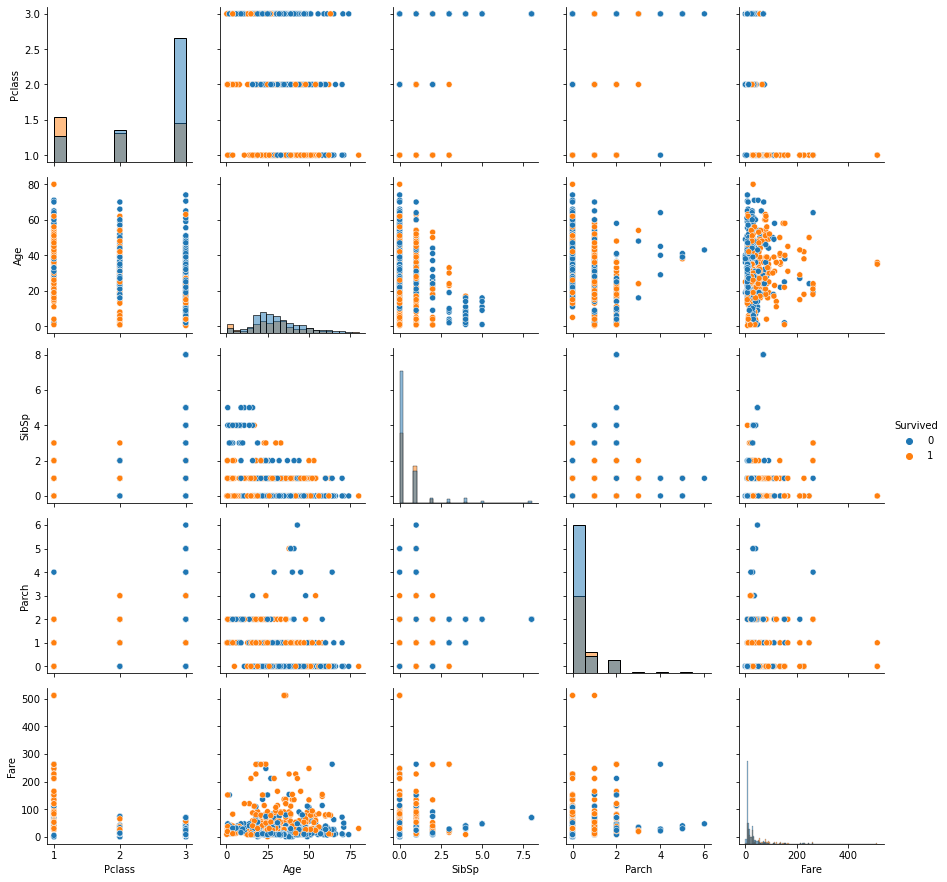

In [59]:
g = sns.PairGrid(train_df, hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


In [32]:
train_df[train_df['Age'].isna()]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64